In [4]:
import os

import pandas as pd
import pandas_datareader.data as pdr

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib
# plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# from pyramid.arima import auto_arima


import seaborn as sns 

# plt.style.use('seaborn-whitegrid')
%matplotlib inline

import itertools

# import numpy as np
# import yfinance as yf

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [34]:
from fbprophet.plot import add_changepoints_to_plot
from fbprophet import Prophet
import logging
logging.getLogger('fbprophet').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings('ignore')

-----------------------

In [35]:
df = pd.read_csv('./data/example_wp_log_peyton_manning.csv')
print(df.shape)
df.head()

(2905, 2)


,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [13]:
df.tail()

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


In [10]:
m=Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future = m.make_future_dataframe(periods=365)
print(future.shape)
future

(3270, 1)


,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14
...,...
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18


In [15]:
forecast=m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.208630,7.475545,8.944259
3266,2017-01-16,8.533648,7.809845,9.262772
3267,2017-01-17,8.321065,7.625968,9.034836
3268,2017-01-18,8.153693,7.431003,8.884606
3269,2017-01-19,8.165630,7.469373,8.862629


yhat -> 예측값
yhat_lower -> 최소값
yhat_upper -> 최대값

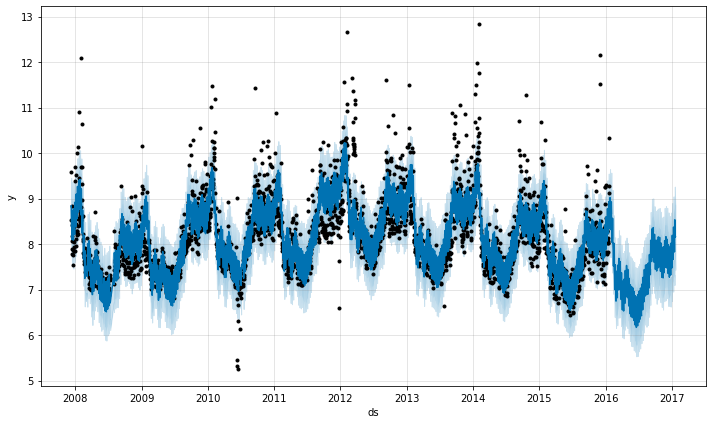

In [16]:
fig1 = m.plot(forecast)

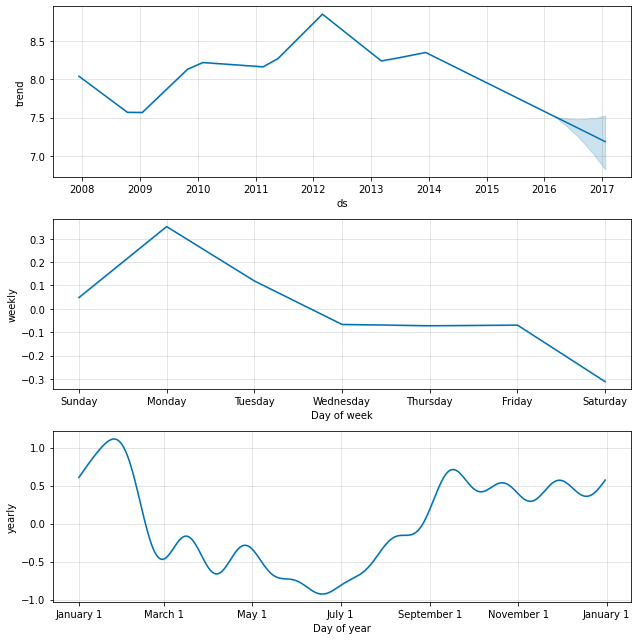

In [19]:
fig2 = m.plot_components(forecast)

In [22]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [23]:
plot_plotly(m, forecast)

NameError: name 'go' is not defined

# 2. 최대값 최소값

In [26]:
df = pd.read_csv('./data/example_wp_log_R.csv')
print(df.shape)
df.tail()

(2863, 2)


,ds,y
2858,2015-12-11,7.834788
2859,2015-12-12,7.360104
2860,2015-12-13,7.479864
2861,2015-12-18,7.765145
2862,2015-12-19,7.220374


In [27]:
df.describe()

,y
count,2863.000000
mean,7.113319
std,0.675609
min,4.077537
25%,6.674561
50%,7.232010
75%,7.637957
max,9.057539


In [30]:
df['cap']=8.5
df.head(1)

,ds,y,cap0,cap
0,2008-01-30,5.976351,8.5,8.5


In [32]:
m = Prophet(growth='logistic')
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


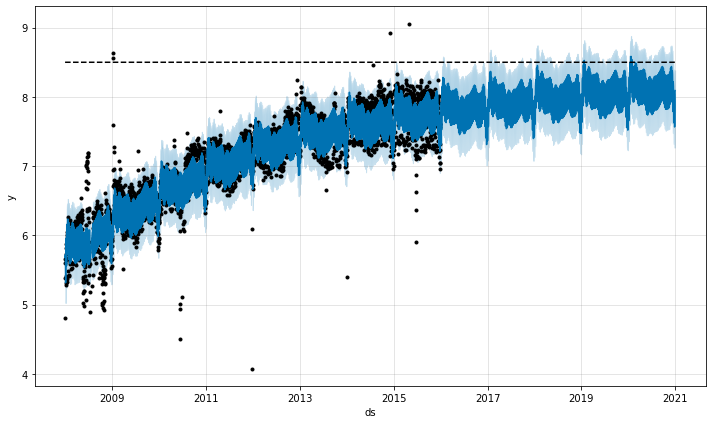

In [33]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
fig = m.plot(fcst)

# 3. Trend Change Point

- changepoint_range(D=0.8)
- changepoint_prior_scale(D=0.05)
- chagepoints(D=auto)

In [36]:
df = pd.read_csv('./data/example_wp_log_peyton_manning.csv')
print(df.shape)
df.head()

(2905, 2)


,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


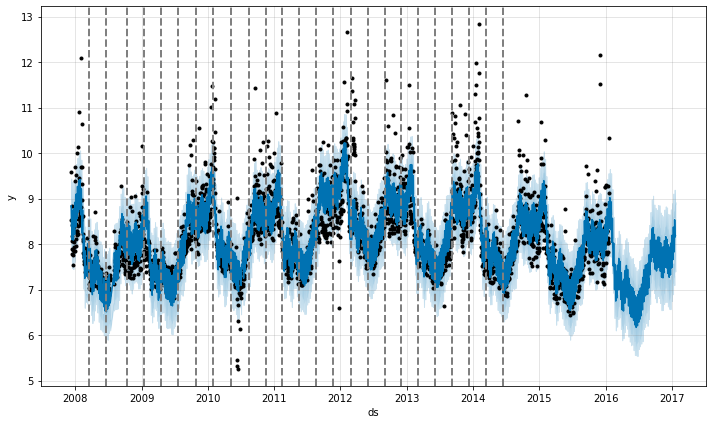

In [38]:
# prophte은 자동을 change points를 감지한다. (기본 약 80%)
m=Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(forecast)
for cp in m.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

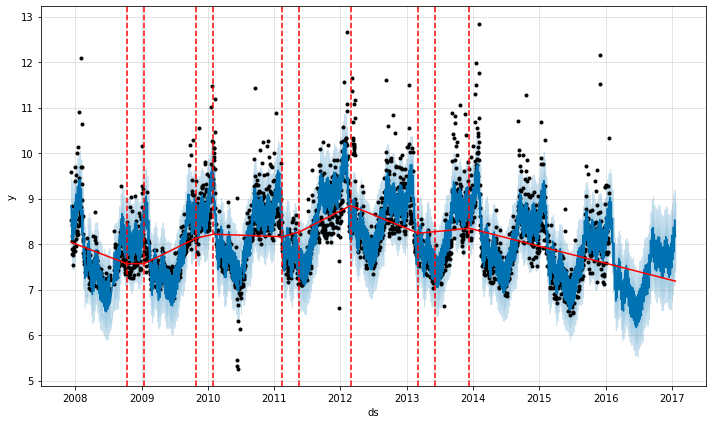

In [39]:
# 점선 : change points, 실선 : Trend
# 기본적으로 change points 80% (과적합 방지)
# m = Prophet(changepoint_range = 0.9) 90%

from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

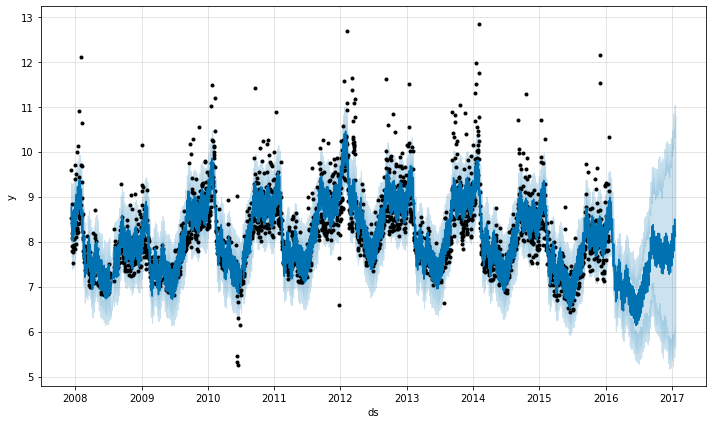

In [42]:
# 추세 유연성
# 늘리면 더 유연, 줄이면 덜 유연

m=Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

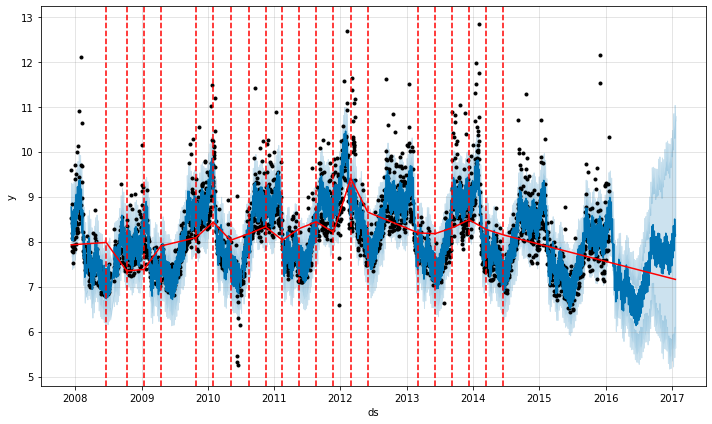

In [43]:
# Trend의 꺾이는 관절 부분 추가

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

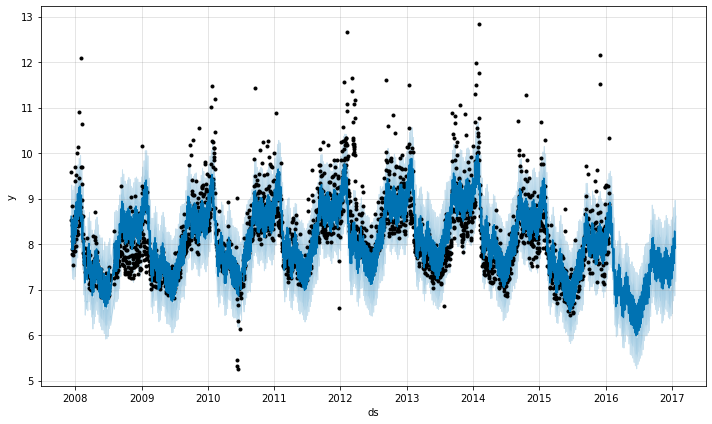

In [45]:
# 변경점 위치 직접 지정

m=Prophet(changepoints=['2014-01-01'])
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

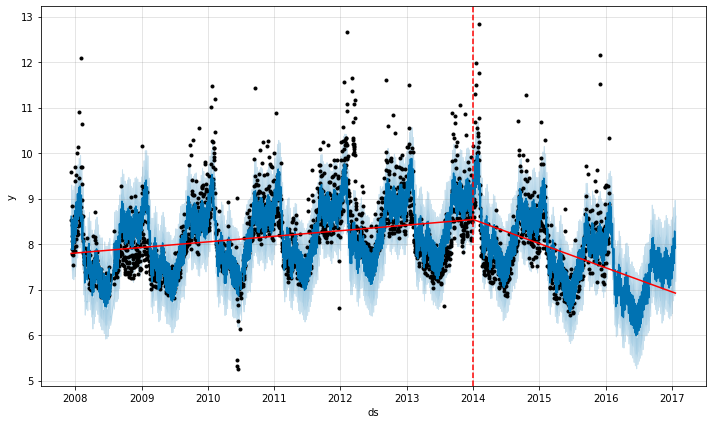

In [46]:
fig = m.plot(forecast)
a=add_changepoints_to_plot(fig.gca(), m, forecast)

# 4. Seasonality, Holiday Effects, And Regressors

- lower_window=-1 -> 크리스마스 이브 처럼 전날에도 영향값
- upper_window=1 -> 박싱데이처럼 다음날까지 영향

In [48]:
df

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [47]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,7.795173,7.924186,9.309347,7.795173,7.795173,0.814249,0.814249,0.814249,0.352194,0.352194,0.352194,0.462055,0.462055,0.462055,0.0,0.0,0.0,8.609423
1,2007-12-11,7.795510,7.662654,9.064464,7.795510,7.795510,0.567877,0.567877,0.567877,0.122009,0.122009,0.122009,0.445869,0.445869,0.445869,0.0,0.0,0.0,8.363387
2,2007-12-12,7.795847,7.523561,8.868167,7.795847,7.795847,0.365368,0.365368,0.365368,-0.065174,-0.065174,-0.065174,0.430541,0.430541,0.430541,0.0,0.0,0.0,8.161215
3,2007-12-13,7.796184,7.445861,8.853647,7.796184,7.796184,0.343870,0.343870,0.343870,-0.072641,-0.072641,-0.072641,0.416510,0.416510,0.416510,0.0,0.0,0.0,8.140054
4,2007-12-14,7.796521,7.414640,8.784206,7.796521,7.796521,0.333955,0.333955,0.333955,-0.070222,-0.070222,-0.070222,0.404177,0.404177,0.404177,0.0,0.0,0.0,8.130476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,2017-01-16,6.927264,7.602899,8.970308,6.927264,6.927264,1.357943,1.357943,1.357943,0.352194,0.352194,0.352194,1.005749,1.005749,1.005749,0.0,0.0,0.0,8.285207
3267,2017-01-17,6.925811,7.409810,8.753258,6.925811,6.925811,1.148260,1.148260,1.148260,0.122009,0.122009,0.122009,1.026252,1.026252,1.026252,0.0,0.0,0.0,8.074072
3268,2017-01-18,6.924359,7.248850,8.568132,6.924359,6.924359,0.980386,0.980386,0.980386,-0.065174,-0.065174,-0.065174,1.045559,1.045559,1.045559,0.0,0.0,0.0,7.904744
3269,2017-01-19,6.922906,7.185974,8.591791,6.922906,6.922906,0.990790,0.990790,0.990790,-0.072641,-0.072641,-0.072641,1.063431,1.063431,1.063431,0.0,0.0,0.0,7.913696
